In [1]:
from torchvision.transforms import ToPILImage
from model import Model
import torch
import torch.optim as optim

import loss
import dataloader
import importlib
importlib.reload(loss)
importlib.reload(dataloader)

loss = loss.loss

/home/brage/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
results = dataloader.Dataloader().load_image(0)

In [3]:
import matplotlib.pyplot as plt

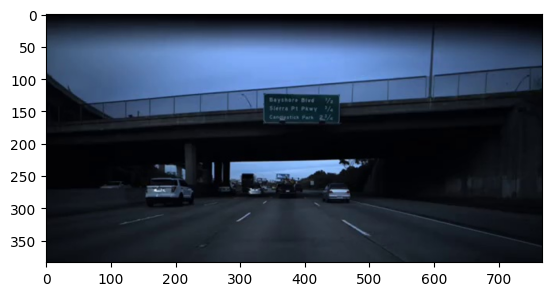

In [4]:
plt.imshow(
    ToPILImage()((results["first_image"] * 255).type(torch.ByteTensor))
)

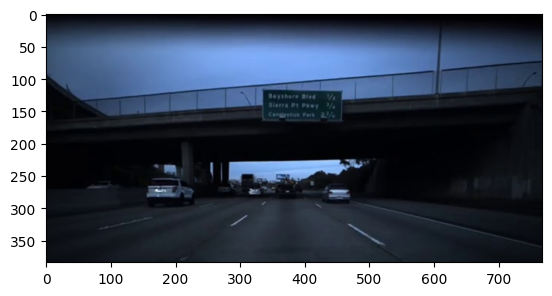

In [5]:
plt.imshow(
    ToPILImage()((results["second_image"] * 255).type(torch.ByteTensor))
)

In [6]:
model = Model()
adam = optim.Adam(model.parameters())

In [7]:
### Training cycle

In [29]:
import random
start_idx = random.randint(100, 300)
for j in range(100):
    results = [
        dataloader.Dataloader().load_image(start_idx + i + j) for i in range(5)
    ]
    left = torch.concat(
            list(x["first_image"].unsqueeze(0)
             for x in results),
        )
    right = torch.concat(
        list(x["second_image"].unsqueeze(0)
         for x in results),
    )
    loss_output = model.forward_apply(
        left,
        right
    )

    model.zero_grad()
    error = loss(
        loss_output["left_input"],
        loss_output["left_reconstructed"],
        loss_output["left_d"],
        # 
        loss_output["right_input"],
        loss_output["right_reconstructed"],
        loss_output["right_d"],
    )
    error.backward()
#    if j % 10 == 0:
    print(f"loss : {error.item()}")
    adam.step()
    
    if 5 <= j:
        break

loss : 0.10432571172714233
loss : 0.10355868935585022
loss : 0.10586151480674744
loss : 0.10184422880411148
loss : 0.08060011267662048
loss : 0.07345835119485855


## Reconstructed

In [17]:
(torch.ones((384, 192)).T @ torch.ones((384, 768))).shape

torch.Size([192, 768])

In [18]:
loss_output["left_reconstructed"][0]

tensor([[[0.0000, 0.0000, 0.0014,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0015, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0049, 0.0086, 0.0081,  ..., 0.0000, 0.0000, 0.0000],
         [0.0091, 0.0128, 0.0123,  ..., 0.0000, 0.0000, 0.0000],
         [0.0055, 0.0074, 0.0071,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0020, 0.0020, 0.0027,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0054, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0161, 0.0143, 0.0145,  ..., 0.0000, 0.0000, 0.0000],
         [0.0199, 0.0181, 0.0184,  ..., 0.0000, 0.0000, 0.0000],
         [0.0110, 0.0100, 0.0102,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0059, 0.0059, 0.0066,  ..., 0.0000, 0.0000, 0.0000],
         [0.0118, 0.0118, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
         [0.0132, 0.0118, 0.0118,  ..., 0.0000, 0.0000, 0.

In [19]:
loss_output["left_reconstructed"].shape

torch.Size([5, 3, 384, 768])

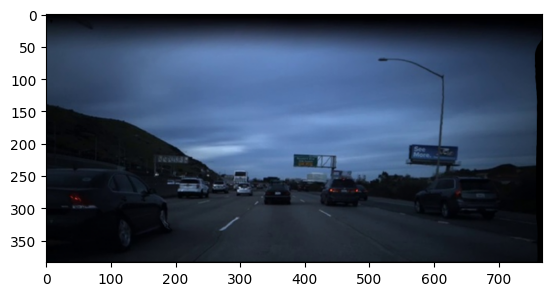

In [20]:
#print(loss_output["left_reconstructed"].shape)
plt.imshow(
    ToPILImage()((loss_output["left_reconstructed"][0] * 255).type(torch.ByteTensor))
)

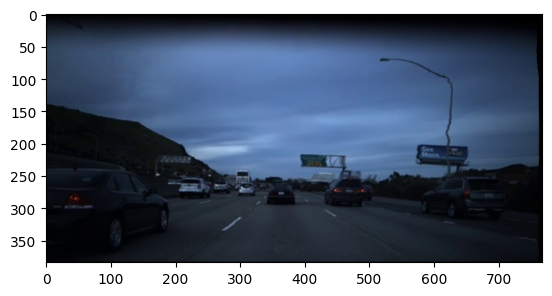

In [21]:
plt.imshow(
    ToPILImage()((loss_output["right_reconstructed"][0] * 255).type(torch.ByteTensor))
)

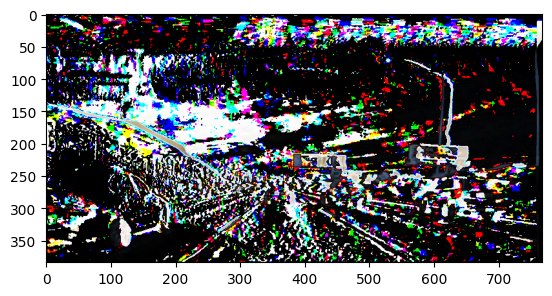

In [22]:
plt.imshow(
    ToPILImage()((loss_output["right_reconstructed"][0] * 255 - loss_output["left_reconstructed"][0] * 255).type(torch.ByteTensor))
)

### Disparity

In [30]:
images =  dataloader.Dataloader().load_image(0)
(_, disparity_metadata) = model.forward(
    images["first_image"].unsqueeze(0).float()
)

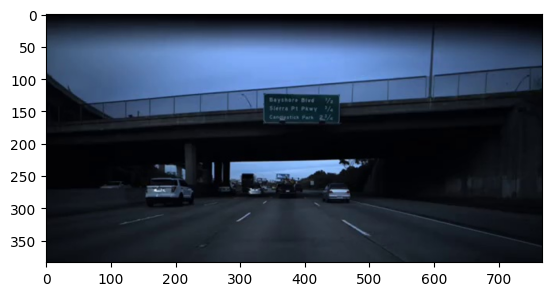

In [31]:
plt.imshow(
    ToPILImage()((images["first_image"] * 255).type(torch.ByteTensor))
)

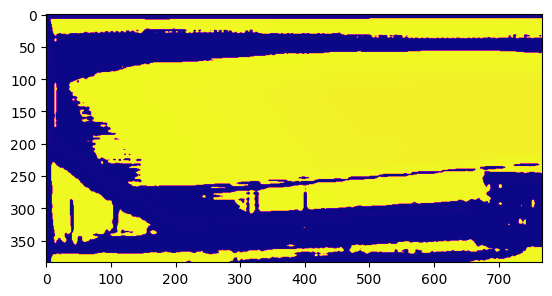

In [34]:
plt.imshow(
    ToPILImage()((disparity_metadata["d_l"][0] * 256).type(torch.ByteTensor)), 
     cmap="plasma"
)

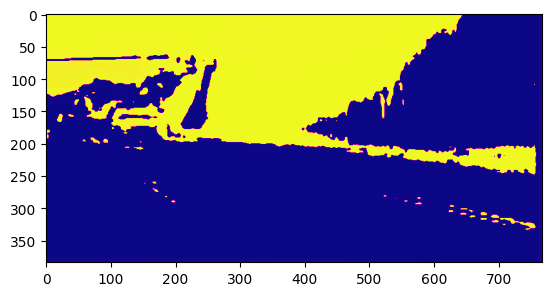

In [35]:
plt.imshow(
    ToPILImage()((disparity_metadata["d_r"][0] * 256).type(torch.ByteTensor)), 
     cmap="plasma"
)